## Imports

In [ ]:
!pip install yfinance
!pip install ta

  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.10.2-py3-none-any.whl size=29089 sha256=88580d00a5efa632f03eb08452d40a91f53d810d23ea11e78c31b109c40e8507
  Stored in directory: /root/.cache/pip/wheels/47/51/06/380dc516ea78621870b93ff65527c251afdfdc5fa9d7f4d248
Successfully built ta


In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

from ta.momentum import RSIIndicator
from ta.volatility import BollingerBands, AverageTrueRange
from sklearn.model_selection import ParameterGrid

## Data Query


In [ ]:
# Func to fetch historical stock datas
def fetch_data(df, stocks, start_date, end_date):
  for stock_symbol in stocks:
      stock_data = yf.Ticker(stock_symbol)
      df[f"{stock_symbol}_Close"] = stock_data.history(start=start_date, end=end_date).Close
      df[f"{stock_symbol}_High"] = stock_data.history(start=start_date, end=end_date).High
      df[f"{stock_symbol}_Low"] = stock_data.history(start=start_date, end=end_date).Low
      df[f"{stock_symbol}_Returns"] = df[f"{stock_symbol}_Close"].pct_change()
      df[f"{stock_symbol}_Log_Returns"] = np.log(df[f"{stock_symbol}_Close"] / df[f"{stock_symbol}_Close"].shift(1))

# Func to fetch historical benchmark data
def fetch_benchmark_data(benchmark_df, start_date, end_date, benchmark_symbol = "SPY"):
  benchmark_df["benchmark"] = yf.Ticker(benchmark_symbol).history(start = start_date, end = end_date).Close
  benchmark_df["benchmark_returns"] = benchmark_df["benchmark"].pct_change()
  benchmark_df = benchmark_df.dropna()

# Func to construct portfolio with stocks
def construct_portfolio_returns(df, stocks, weights):
  # Calculate daily portfolio returns with individual weights
  portfolio_returns = df[[f"{stock_symbol}_Returns" for stock_symbol in stocks]].dot(weights)
  df['Portfolio_Log_Returns'] = portfolio_returns

In [ ]:
# Constants
stocks = ["META", "AAPL", "AMZN", "NFLX", "GOOGL"]
start_date = "2015-01-01"
end_date = "2019-12-31"
weights = [0.2, 0.2, 0.2, 0.2, 0.2]
df = pd.DataFrame()
benchmark_df = pd.DataFrame()


fetch_data(df, stocks, start_date, end_date)
fetch_benchmark_data(benchmark_df, start_date, end_date)
construct_portfolio_returns(df, stocks, weights)
df

,META_Close,META_High,META_Low,META_Returns,META_Log_Returns,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Returns,AAPL_Log_Returns,...,NFLX_High,NFLX_Low,NFLX_Returns,NFLX_Log_Returns,GOOGL_Close,GOOGL_High,GOOGL_Low,GOOGL_Returns,GOOGL_Log_Returns,Portfolio_Log_Returns
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,78.449997,78.930000,77.699997,NaN,NaN,24.498690,24.971499,24.055010,NaN,NaN,...,50.331429,48.731430,NaN,NaN,26.477501,26.790001,26.393999,NaN,NaN,NaN
2015-01-05 00:00:00-05:00,77.190002,79.250000,76.860001,-0.016061,-0.016191,23.808510,24.346302,23.620283,-0.028172,-0.028577,...,49.258572,47.147144,-0.050897,-0.052238,25.973000,26.399500,25.887501,-0.019054,-0.019238,-0.026940
2015-01-06 00:00:00-05:00,76.150002,77.589996,75.360001,-0.013473,-0.013565,23.810760,24.072934,23.445509,0.000095,0.000095,...,47.639999,45.661430,-0.017121,-0.017269,25.332001,26.060499,25.277500,-0.024679,-0.024989,-0.015602
2015-01-07 00:00:00-05:00,76.150002,77.360001,75.820000,0.000000,0.000000,24.144642,24.245477,23.909357,0.014022,0.013925,...,47.421429,46.271427,0.005192,0.005178,25.257500,25.574499,25.182501,-0.002941,-0.002945,0.005375
2015-01-08 00:00:00-05:00,78.180000,78.230003,76.080002,0.026658,0.026309,25.072327,25.130588,24.357510,0.038422,0.037702,...,47.835712,46.478573,0.022188,0.021946,25.345501,25.375000,24.750999,0.003484,0.003478,0.019518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-23 00:00:00-05:00,206.179993,208.589996,205.679993,-0.000582,-0.000582,69.261612,69.322582,68.376330,0.016319,0.016187,...,337.950012,331.019989,-0.011279,-0.011343,67.531502,68.092499,67.400002,-0.000437,-0.000437,0.001532
2019-12-24 00:00:00-05:00,205.119995,206.789993,205.000000,-0.005141,-0.005154,69.327461,69.478672,68.998231,0.000951,0.000950,...,335.700012,331.600006,0.000300,0.000300,67.221497,67.600502,67.208504,-0.004591,-0.004601,-0.002119
2019-12-26 00:00:00-05:00,207.789993,207.820007,205.309998,0.013017,0.012933,70.702919,70.719992,69.432312,0.019840,0.019646,...,336.459991,332.010010,-0.001711,-0.001712,68.123497,68.160004,67.275497,0.013418,0.013329,0.017806


## Strategy: RSI & BB Mean Reversion / Momentum


In the context of mean reversion, our strategy involves buying when the RSI indicates oversold conditions and selling short when the RSI signals overbought conditions. To complement this, we initiate buy orders only when prices dip below the lower BB band and sell orders when prices rise above the upper BB band. These popular well-defined rules serve as a guide for our trading decisions.

Furthermore, our strategy showcases versatility by using a RSI and BB combination as an additional buy condition during strong upward market trends. When the RSI registers elevated levels and prices extend above the middle BB band, we perceive this as a compelling signal to enter long positions due to momentum. This strategic flexibility equips us to harness the full potential of vigorous bullish market movements, allowing us to actively participate in and profit from sustained uptrends.

By imposing strict rules and conditions, we bolster the confirmation of our trading signals, enhancing our potential to capture profitable opportunities across a spectrum of market conditions.

CONDITIONS:

SHORT: RSI above overbought region & over BB upper band (Mean Reversion)

LONG: RSI under oversold & under BB lower band (Mean Reversion)

LONG: RSI between 70 and overbought region & above BB middle band (Momentum)


In [ ]:
class RSI_BB_Strategy():

  def __init__(self, data, stocks, benchmark_df):
    self.data = data
    self.stocks = stocks
    self.benchmark_df = benchmark_df
    self.tune_parameters()

  # Func to reset parameters
  def tune_parameters(self, rsi_window=10, rsi_overbought=80, rsi_oversold=30, bb_window=20, bb_std_dev=2, atr_window=14, sl_multiplier=2, tp_multiplier=4):
    self.rsi_window = rsi_window
    self.rsi_overbought = rsi_overbought
    self.rsi_oversold = rsi_oversold
    self.bb_window = bb_window
    self.bb_std_dev = bb_std_dev
    self.atr_window = atr_window
    self.sl_multiplier = sl_multiplier
    self.tp_multiplier = tp_multiplier
    self.init_performance_data()

  # Init performance data
  def init_performance_data(self):
    self.performance_data = pd.DataFrame()
    self.performance_data["STOCK"] = self.stocks + ["PORTFOLIO"]

  # Func to calculate RSI for a stock
  def calculate_rsi(self, stock_symbol):
      rsi = RSIIndicator(close=self.data[f"{stock_symbol}_Close"], window=self.rsi_window).rsi()
      return rsi

  # Func to calculate Bollinger Bands for a stock
  def calculate_bollinger_bands(self, stock_symbol):
      indicator_bb = BollingerBands(close=self.data[f"{stock_symbol}_Close"], window=self.bb_window, window_dev=self.bb_std_dev)
      upper_band = indicator_bb.bollinger_hband()
      mavg_band = indicator_bb.bollinger_mavg()
      lower_band = indicator_bb.bollinger_lband()
      return upper_band, mavg_band, lower_band

  # Func to calculate ATR for a stock
  def calculate_atr(self, stock_symbol):
      atr = AverageTrueRange(high = self.data[f"{stock_symbol}_High"], low = self.data[f"{stock_symbol}_Low"], close = self.data[f"{stock_symbol}_Close"], window = self.atr_window, fillna = False).average_true_range()
      return atr

  # Func to generate trading positions and signals
  def run(self):
    for stock_symbol in self.stocks:
          self.data[f"{stock_symbol}_RSI"] = self.calculate_rsi(stock_symbol)
          self.data[f"{stock_symbol}_ATR"] = self.calculate_atr(stock_symbol)
          upper_band, mavg_band, lower_band = self.calculate_bollinger_bands(stock_symbol)
          self.data[f"{stock_symbol}_Upper_Band"] = upper_band
          self.data[f"{stock_symbol}_Mavg_Band"] = mavg_band
          self.data[f"{stock_symbol}_Lower_Band"] = lower_band

          # Generate rule-based signals
          num_rows = len(self.data)
          positions = [0] * num_rows
          take_profit_price, stop_loss_price = 0, 0
          buy_trend_counter = 0

          for i in range(1, num_rows):
              # Define buy and sell rules
              short_condition_1 = (self.data[f"{stock_symbol}_RSI"][i] > self.rsi_overbought) and (self.data[f"{stock_symbol}_Close"][i] > self.data[f"{stock_symbol}_Upper_Band"][i])
              long_condition_1 = (self.data[f"{stock_symbol}_RSI"][i] < self.rsi_oversold) and (self.data[f"{stock_symbol}_Close"][i] < self.data[f"{stock_symbol}_Lower_Band"][i])
              long_condition_2 = (70 <= self.data[f"{stock_symbol}_RSI"][i] <= self.rsi_overbought) and (self.data[f"{stock_symbol}_Close"][i] > self.data[f"{stock_symbol}_Mavg_Band"][i])

              # Check long position, if the current price within the take profit or stop loss levels
              if (positions[i - 1] == 1) and (stop_loss_price <= self.data[f"{stock_symbol}_Close"][i] <= take_profit_price): positions[i] = positions[i-1]

              # Check short position, if the current price within the take profit or stop loss levels
              elif (positions[i - 1] == -1) and (stop_loss_price >= self.data[f"{stock_symbol}_Close"][i] >= take_profit_price): positions[i] = positions[i-1]

              # Check if no positions opened and possible to open new trade
              elif (positions[i - 1] == 0):
                if buy_trend_counter < 4 and long_condition_2: # if meet LONG condition 2 + trending for up to 3 consecutive trades
                  take_profit_price, stop_loss_price = self.get_tp_sl(stock_symbol, i, "LONG_MOMENTUM")
                  positions[i] = 1
                  buy_trend_counter += 1
                elif buy_trend_counter > 1 and short_condition_1: # if meet SHORT condition 1 + trending for more than 2 trades
                  take_profit_price, stop_loss_price = self.get_tp_sl(stock_symbol, i, "SHORT_REVERSION")
                  positions[i] = -1
                  buy_trend_counter += 1
                elif long_condition_1: # if meet LONG condition 1
                  take_profit_price, stop_loss_price = self.get_tp_sl(stock_symbol, i, "LONG_REVERSION")
                  positions[i] = 1
                  buy_trend_counter = 0 # reset

              # Close / no position
              else: positions[i] = 0

          # Set the positions column in the DataFrame
          self.data[f"{stock_symbol}_Position"] = positions

          # Generate signals from positions using diff()
          self.data[f"{stock_symbol}_Signal"] = self.data[f"{stock_symbol}_Position"].diff()

  # Func to update take profit and stop loss
  def get_tp_sl(self, stock_symbol, index, side):
    atr = self.data[f"{stock_symbol}_ATR"][index]
    price = self.data[f"{stock_symbol}_Close"][index]
    if side == 'LONG_REVERSION': return price + atr * 10, price - atr * 4 # assume potential for larger profits
    elif side == 'LONG_MOMENTUM': return price + atr * self.tp_multiplier, price - atr * self.sl_multiplier
    elif side == 'SHORT_REVERSION': return price - atr * self.sl_multiplier, price + atr * self.tp_multiplier

  # Func to generate strategy returns
  def backtest(self):
    all_stock_returns, all_strategy_returns = [], []
    for stock_symbol in self.stocks:
      self.data[f"{stock_symbol}_Strategy_Returns"] = self.data[f"{stock_symbol}_Log_Returns"] * self.data[f"{stock_symbol}_Position"].shift(1)
      stock_returns = self.data[f"{stock_symbol}_Log_Returns"].mean() * 252
      strategy_returns = self.data[f"{stock_symbol}_Strategy_Returns"].mean() * 252
      all_stock_returns.append(stock_returns)
      all_strategy_returns.append(strategy_returns)

    all_stock_returns.append(sum(all_stock_returns) / 5)
    all_strategy_returns.append(sum(all_strategy_returns) / 5)
    self.performance_data["STOCK_RETURNS"] = np.exp(all_stock_returns) - 1
    self.performance_data["STRAT_RETURNS"] = np.exp(all_strategy_returns) - 1

  # --------------------------------------- VISUALISATIONS --------------------------------------- #
  # Func to visualise returns
  def visualise_returns(self):
    for stock_symbol in self.stocks:
      plt.figure(figsize=(10, 5))
      plt.plot(self.data[f"{stock_symbol}_Log_Returns"].cumsum(), label='Stock returns')
      plt.plot(self.data[f"{stock_symbol}_Strategy_Returns"].cumsum(), label='Strategy returns')
      plt.title(f"Strategy vs stock returns for Stock: {stock_symbol}")
      plt.legend()

  # Func to plot histograms
  def plot_histograms(self):
    for stock_symbol in self.stocks:
      plt.figure(figsize=(15, 6))
      plt.hist(self.data[f"{stock_symbol}_Log_Returns"], bins = 40)
      plt.title(f"Histogram of Stock Daily Log Returns - {stock_symbol}")
      plt.grid()
      plt.show()

  # Func to plot drawdowns
  def plot_drawdowns(self):
    self.calc_drawdowns()
    for stock_symbol in self.stocks:
      self.data[[f"{stock_symbol}_Gross_Cum_Returns", f"{stock_symbol}_Cum_Max"]].dropna().plot(figsize =(15,6))

  # Func to visualise strategy
  def visualise_strategy(self):
    for stock_symbol in self.stocks:
      plt.figure(figsize=(14, 8))
      gs = gridspec.GridSpec(2, 1, height_ratios=[3, 1])

      # Create the top subplot (subplot 1) for the price chart
      ax1 = plt.subplot(gs[0])
      plt.plot(self.data[f"{stock_symbol}_Close"], color='black', label='Price', linestyle='dashed')
      plt.plot(self.data.index[self.data[f"{stock_symbol}_Signal"] == 1], self.data[f"{stock_symbol}_Close"][self.data[f"{stock_symbol}_Signal"] == 1], '^', markersize = 8, color = 'g', label='Buy/Long Signal')
      plt.plot(self.data.index[self.data[f"{stock_symbol}_Signal"] == -1], self.data[f"{stock_symbol}_Close"][self.data[f"{stock_symbol}_Signal"] == -1], 'v', markersize = 8, color = 'r', label='Sell/Short Signal')
      plt.plot(self.data[f"{stock_symbol}_Upper_Band"], color='b', label='BBUpperBand', linewidth=0.7)
      plt.plot(self.data[f"{stock_symbol}_Mavg_Band"], color='y', label='BBMavgBand', linewidth=0.7)
      plt.plot(self.data[f"{stock_symbol}_Lower_Band"], color='r', label='BBLowerBand', linewidth=0.7)
      plt.xlabel("Days")
      plt.ylabel("Price")
      plt.title(f"RSI BB Strategy on Stock: {stock_symbol}")
      plt.legend()
      plt.grid()

      # Create the bottom subplot (subplot 2) for RSI
      ax2 = plt.subplot(gs[1], sharex=ax1)  # Share the same x-axis with subplot 1
      plt.plot(self.data.index, self.data[f"{stock_symbol}_RSI"], color='purple', label='RSI')
      plt.axhline(y=self.rsi_overbought, color='r', linestyle='--', label=f'Overbought ({self.rsi_overbought})')
      plt.axhline(y=self.rsi_oversold, color='g', linestyle='--', label=f'Oversold ({self.rsi_oversold})')
      plt.axhline(y=70, color='g', linestyle='--', label=f'Trending RSI')
      plt.xlabel("Days")
      plt.ylabel("RSI")
      plt.legend()
      plt.grid()

      plt.tight_layout()
      plt.show()


  # ------------------------------------ PORTFOLIO PERFORMANCE ------------------------------------ #
  # Func to measure performance of portfolio after strategy run
  def performance(self):
    self.generate_portfolio_strat_returns([0.2] * 5)
    self.performance_data["STOCK_BETA"], self.performance_data["STRAT_BETA"], self.performance_data["STOCK_ALPHA"], self.performance_data["STRAT_ALPHA"] = self.calc_beta_and_alpha()
    self.performance_data["STOCK_SD"], self.performance_data["STRAT_SD"] = self.calc_stock_std_dev(), self.calc_strat_std_dev()
    self.performance_data["STOCK_SR"], self.performance_data["STRAT_SR"] = self.calc_sharpe()
    self.performance_data["MAX_DRAWDOWN"] = self.calc_drawdowns()
    self.performance_data["CALMAR_RATIO"] = self.calc_calmar_ratio()
    self.performance_data["SORTINO_RATIO"] = self.calc_sortino_ratio()

    for column in self.performance_data.columns:
      if column != 'STOCK':
        self.performance_data[column] = self.performance_data[column].map(lambda x: round(x, 3))
    return self.performance_data

  def generate_portfolio_strat_returns(self, weights):
    portfolio_returns = self.data[[f"{stock_symbol}_Strategy_Returns" for stock_symbol in self.stocks]].dot(weights)
    self.data['Portfolio_Strategy_Returns'] = portfolio_returns

  def perf_annual_strat_returns(self):
    return self.performance_data['STRAT_RETURNS'][5]

  def perf_annual_stock_returns(self):
    return self.performance_data['STOCK_RETURNS'][5]

  # ------------------------------------ CALCULATION HELPERS ------------------------------------ #
  def calc_sharpe(self):
    stock_sharpe_ratios, strat_sharpe_ratios = [], []
    for i, stock_symbol in enumerate(self.stocks + ["Portfolio"]):
      stock_annual_regular_ret = self.performance_data["STOCK_RETURNS"][i]
      stock_annual_regular_std = self.performance_data["STOCK_SD"][i]
      strat_annual_regular_ret = self.performance_data["STRAT_RETURNS"][i]
      strat_annual_regular_std = self.performance_data["STRAT_SD"][i]
      stock_sr = stock_annual_regular_ret / stock_annual_regular_std
      strat_sr = strat_annual_regular_ret / strat_annual_regular_std
      stock_sharpe_ratios.append(stock_sr)
      strat_sharpe_ratios.append(strat_sr)
    return stock_sharpe_ratios, strat_sharpe_ratios

  def calc_drawdowns(self):
    all_max_drawdowns = []
    for stock_symbol in self.stocks:
      # required to create col for cum_returns and cum_max for plot_drawdowns
      self.data[f"{stock_symbol}_Gross_Cum_Returns"] = self.data[f"{stock_symbol}_Strategy_Returns"].cumsum().apply(np.exp)
      self.data[f"{stock_symbol}_Cum_Max"] = self.data[f"{stock_symbol}_Gross_Cum_Returns"].cummax()
      self.data[f"{stock_symbol}_Drawdown"] = self.data[f"{stock_symbol}_Cum_Max"] - self.data[f"{stock_symbol}_Gross_Cum_Returns"]
      max_drawdown = self.data[f"{stock_symbol}_Drawdown"].max()
      all_max_drawdowns.append(max_drawdown)

    self.data[f"Portfolio_Gross_Cum_Returns"] = self.data[f"Portfolio_Strategy_Returns"].cumsum().apply(np.exp)
    self.data[f"Portfolio_Cum_Max"] = self.data[f"Portfolio_Gross_Cum_Returns"].cummax()
    self.data["Portfolio_Drawdown"] = self.data[f"Portfolio_Cum_Max"] - self.data[f"Portfolio_Gross_Cum_Returns"]
    max_drawdown = self.data["Portfolio_Drawdown"].max()
    all_max_drawdowns.append(max_drawdown)
    return all_max_drawdowns

  def calc_calmar_ratio(self):
    all_calmars = []
    max_drawdowns = self.calc_drawdowns()
    for i, stock_symbol in enumerate(self.stocks + ["Portfolio"]):
      strat_annual_regular_ret = self.performance_data["STRAT_RETURNS"][i]
      calmar = strat_annual_regular_ret / abs(max_drawdowns[i])
      calmar = round(calmar, 3)
      all_calmars.append(calmar)
    return all_calmars

  def calc_sortino_ratio(self):
    all_sortinos = []
    for i, stock_symbol in enumerate(self.stocks + ["Portfolio"]):
      strat_annual_regular_ret = self.performance_data["STRAT_RETURNS"][i]
      non_positive_returns =  self.data.copy()
      non_positive_returns[non_positive_returns[f"{stock_symbol}_Strategy_Returns"] > 0] = 0
      non_positive_returns = non_positive_returns[f"{stock_symbol}_Strategy_Returns"]
      neg_std_dev = (np.exp(non_positive_returns)-1).std() * (252**0.5)
      sortino = strat_annual_regular_ret / neg_std_dev
      sortino = round(sortino, 3)
      all_sortinos.append(sortino)
    return all_sortinos

  def calc_strat_std_dev(self):
    all_sds = []
    for stock_symbol in self.stocks:
      daily_std = (np.exp(self.data[f"{stock_symbol}_Strategy_Returns"])-1).std()
      annual_std =  daily_std * (252 **0.5)
      all_sds.append(annual_std)
    portfolio_strat_returns = [(np.exp(self.data["Portfolio_Strategy_Returns"])-1).std() * (252 **0.5)]
    return all_sds + portfolio_strat_returns

  def calc_stock_std_dev(self):
    all_sds = []
    for stock_symbol in self.stocks:
      daily_std = (np.exp(self.data[f"{stock_symbol}_Log_Returns"])-1).std()
      annual_std =  daily_std * (252 **0.5)
      all_sds.append(annual_std)
    portfolio_stock_returns = [(np.exp(self.data["Portfolio_Log_Returns"])-1).std() * (252 **0.5)]
    return all_sds + portfolio_stock_returns

  def calc_beta_and_alpha(self):
    all_stock_beta, all_strat_beta = [], []
    all_stock_alpha, all_strat_alpha = [], []
    for stock_symbol in self.stocks + ["Portfolio"]:
      daily_stock_returns = self.data[f"{stock_symbol}_Log_Returns"].map(lambda x: np.exp(x) - 1)
      daily_strat_returns = self.data[f"{stock_symbol}_Strategy_Returns"].map(lambda x: np.exp(x) - 1)
      stock_cov = self.benchmark_df["benchmark_returns"].cov(daily_stock_returns)
      strat_cov = self.benchmark_df["benchmark_returns"].cov(daily_strat_returns)
      var = self.benchmark_df["benchmark_returns"].var()
      stock_beta = stock_cov / var
      strat_beta = strat_cov / var
      all_stock_beta.append(stock_beta)
      all_strat_beta.append(strat_beta)

      benchmark_abs_returns = self.benchmark_df["benchmark_returns"].mean()*252
      stock_abs_returns = daily_stock_returns.mean()*252
      strat_abs_returns = daily_strat_returns.mean()*252
      stock_alpha = (stock_abs_returns - stock_beta *benchmark_abs_returns)
      all_stock_alpha.append(stock_alpha)
      strat_alpha = (strat_abs_returns - strat_beta *benchmark_abs_returns)
      all_strat_alpha.append(strat_alpha)

    return all_stock_beta, all_strat_beta, all_stock_alpha, all_strat_alpha


# Default execution
strat = RSI_BB_Strategy(df, stocks, benchmark_df)
strat.run()
strat.backtest()
strat.performance()


,STOCK,STOCK_RETURNS,STRAT_RETURNS,STOCK_BETA,STRAT_BETA,STOCK_ALPHA,STRAT_ALPHA,STOCK_SD,STRAT_SD,STOCK_SR,STRAT_SR,MAX_DRAWDOWN,CALMAR_RATIO,SORTINO_RATIO
0,META,0.212,0.226,1.183,0.911,0.092,0.128,0.282,0.251,0.750,0.902,0.932,0.243,1.427
1,AAPL,0.238,0.227,1.241,0.905,0.098,0.120,0.248,0.213,0.959,1.065,0.421,0.539,1.717
2,AMZN,0.432,0.408,1.320,1.051,0.245,0.252,0.293,0.261,1.476,1.561,1.477,0.276,2.763
3,NFLX,0.455,0.397,1.531,0.988,0.280,0.291,0.417,0.387,1.092,1.024,2.330,0.170,1.819
4,GOOGL,0.205,0.233,1.182,0.975,0.074,0.116,0.238,0.214,0.861,1.090,0.512,0.455,1.898
5,PORTFOLIO,0.304,0.295,1.290,0.967,0.184,0.162,0.228,0.189,1.330,1.560,0.779,0.379,2.639


## Training

In [ ]:
def grid_search():
  # Define strategy parameters
  print('Starting Grid Search...')
  starttime = dt.datetime.now()
  rsi_window = 10, 14
  rsi_overbought = 75, 80, 85
  rsi_oversold = 30, 35, 40
  bb_window = 20, 10
  bb_std_dev = 1.8, 2
  atr_window = 12, 14
  sl_multiplier = 2, 3
  tp_multiplier = 4, 6
  param_grid = {
      'rsi_window': rsi_window,
      'rsi_overbought': rsi_overbought,
      'rsi_oversold': rsi_oversold,
      'bb_window': bb_window,
      'bb_std_dev': bb_std_dev,
      'atr_window': atr_window,
      'sl_multiplier': sl_multiplier,
      'tp_multiplier': tp_multiplier
      }
  all_parameters = ParameterGrid(param_grid)

  optimal_strat, highest_return = None, 0
  results = []
  for parameters in all_parameters:
    strat.tune_parameters(**parameters)
    strat.run()
    strat.backtest()
    annual_strat_returns = strat.perf_annual_strat_returns()
    if annual_strat_returns > highest_return:
      highest_return = annual_strat_returns
      optimal_strat = parameters
    parameters.update({'Annual_Strategy_Returns': annual_strat_returns})
    results.append(parameters)

  search_data = pd.DataFrame.from_records(results)
  search_data.sort_values(by=['Annual_Strategy_Returns'], ascending=False)
  search_data.reset_index(drop=True)

  print(f'\nGrid Search Complete - Time Elapsed: {dt.datetime.now() - starttime}')
  print(f'\nOptimal Parameters: {optimal_strat}')
  print(f'\nStock Annual Return: {strat.perf_annual_stock_returns()}')
  print(f'\nStrategy Annual Return: {highest_return}')
  del optimal_strat['Annual_Strategy_Returns']
  return search_data, optimal_strat

search_data, optimal_strat = grid_search()
search_data

Starting Grid Search...

Grid Search Complete - Time Elapsed: 0:02:16.685323

Optimal Parameters: {'atr_window': 14, 'bb_std_dev': 2, 'bb_window': 20, 'rsi_overbought': 80, 'rsi_oversold': 40, 'rsi_window': 10, 'sl_multiplier': 3, 'tp_multiplier': 4, 'Annual_Strategy_Returns': 0.33086365650216987}

Stock Annual Return: 0.3037646058217218

Strategy Annual Return: 0.33086365650216987


,atr_window,bb_std_dev,bb_window,rsi_overbought,rsi_oversold,rsi_window,sl_multiplier,tp_multiplier,Annual_Strategy_Returns
0,12,1.8,20,75,30,10,2,4,0.182867
1,12,1.8,20,75,30,10,2,6,0.196210
2,12,1.8,20,75,30,10,3,4,0.247977
3,12,1.8,20,75,30,10,3,6,0.239468
4,12,1.8,20,75,30,14,2,4,0.165704
...,...,...,...,...,...,...,...,...,...
571,14,2.0,10,85,40,10,3,6,0.256296
572,14,2.0,10,85,40,14,2,4,0.209208
573,14,2.0,10,85,40,14,2,6,0.216832
574,14,2.0,10,85,40,14,3,4,0.196571


In [ ]:
# Re-run optimal
print(f'Optimal Parameters: {optimal_strat}')
strat.tune_parameters(**optimal_strat)
strat.run()
strat.backtest()
strat.performance()

Optimal Parameters: {'atr_window': 14, 'bb_std_dev': 2, 'bb_window': 20, 'rsi_overbought': 80, 'rsi_oversold': 40, 'rsi_window': 10, 'sl_multiplier': 3, 'tp_multiplier': 4}


,STOCK,STOCK_RETURNS,STRAT_RETURNS,STOCK_BETA,STRAT_BETA,STOCK_ALPHA,STRAT_ALPHA,STOCK_SD,STRAT_SD,STOCK_SR,STRAT_SR,MAX_DRAWDOWN,CALMAR_RATIO,SORTINO_RATIO
0,META,0.212,0.252,1.183,0.933,0.092,0.149,0.282,0.263,0.750,0.956,1.218,0.207,1.520
1,AAPL,0.238,0.289,1.241,1.018,0.098,0.160,0.248,0.233,0.959,1.240,0.548,0.527,2.041
2,AMZN,0.432,0.478,1.320,1.150,0.245,0.289,0.293,0.263,1.476,1.818,1.625,0.294,3.237
3,NFLX,0.455,0.367,1.531,0.919,0.280,0.264,0.417,0.350,1.092,1.047,1.914,0.192,1.829
4,GOOGL,0.205,0.282,1.182,0.963,0.074,0.159,0.238,0.221,0.861,1.274,0.621,0.454,2.261
5,PORTFOLIO,0.304,0.331,1.290,0.998,0.184,0.186,0.228,0.192,1.330,1.722,0.838,0.395,2.893


In [ ]:
strat.data.head()

,META_Close,META_High,META_Low,META_Returns,META_Log_Returns,AAPL_Close,AAPL_High,AAPL_Low,AAPL_Returns,AAPL_Log_Returns,...,AMZN_Drawdown,NFLX_Gross_Cum_Returns,NFLX_Cum_Max,NFLX_Drawdown,GOOGL_Gross_Cum_Returns,GOOGL_Cum_Max,GOOGL_Drawdown,Portfolio_Gross_Cum_Returns,Portfolio_Cum_Max,Portfolio_Drawdown
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02 00:00:00-05:00,78.449997,78.930000,77.699997,NaN,NaN,24.498686,24.971495,24.055006,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05 00:00:00-05:00,77.190002,79.250000,76.860001,-0.016061,-0.016191,23.808516,24.346308,23.620289,-0.028172,-0.028576,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2015-01-06 00:00:00-05:00,76.150002,77.589996,75.360001,-0.013473,-0.013565,23.810757,24.072930,23.445505,0.000094,0.000094,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2015-01-07 00:00:00-05:00,76.150002,77.360001,75.820000,0.000000,0.000000,24.144636,24.245472,23.909351,0.014022,0.013925,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0
2015-01-08 00:00:00-05:00,78.180000,78.230003,76.080002,0.026658,0.026309,25.072329,25.130590,24.357512,0.038422,0.037703,...,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0


## Visualisations

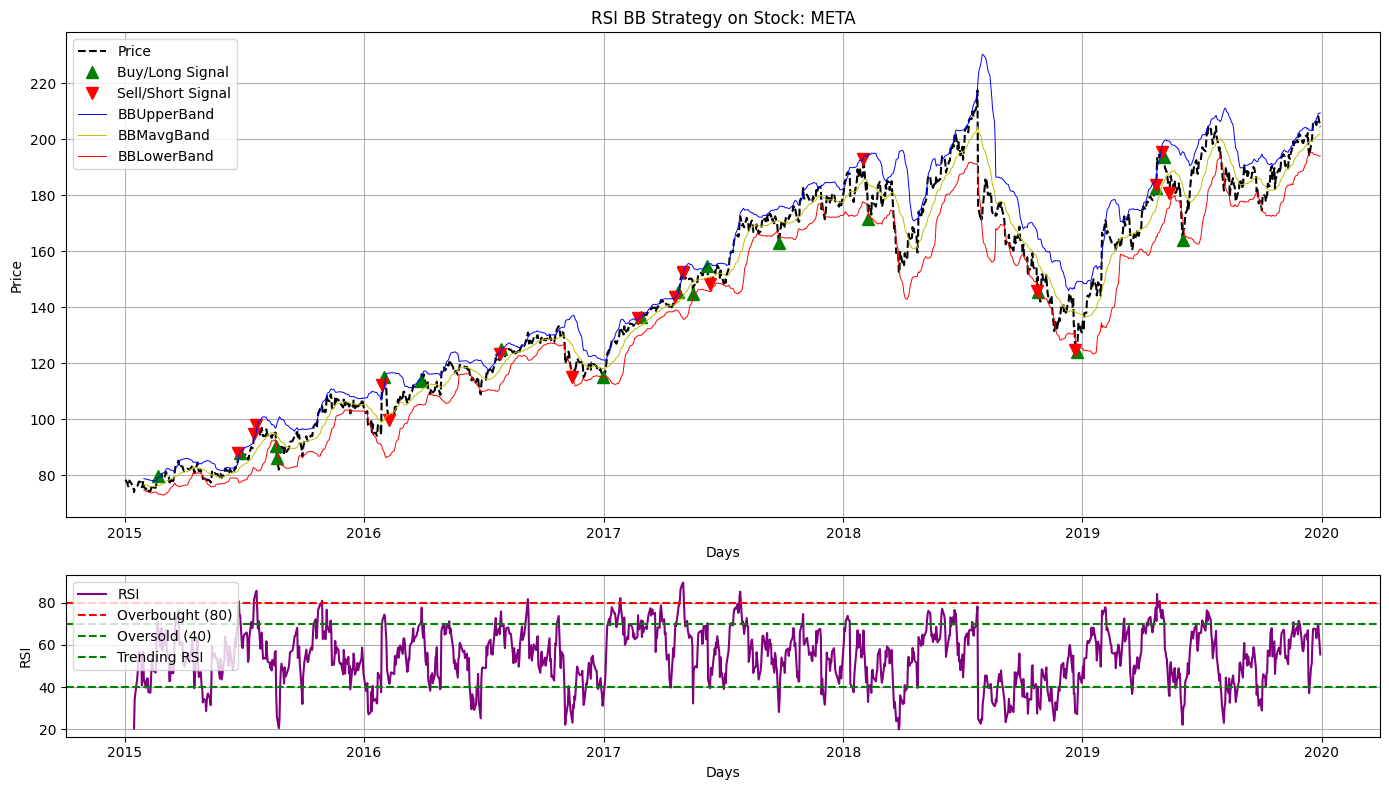

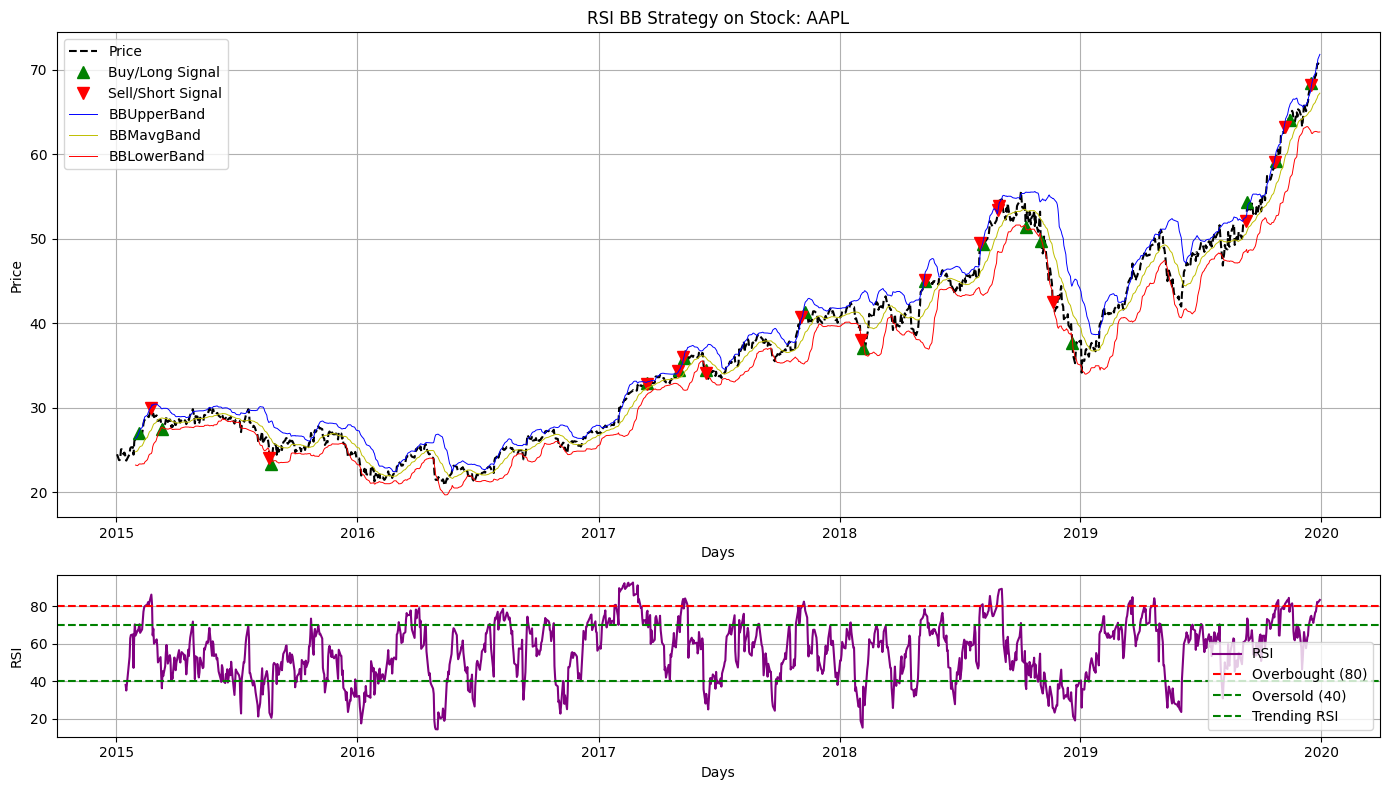

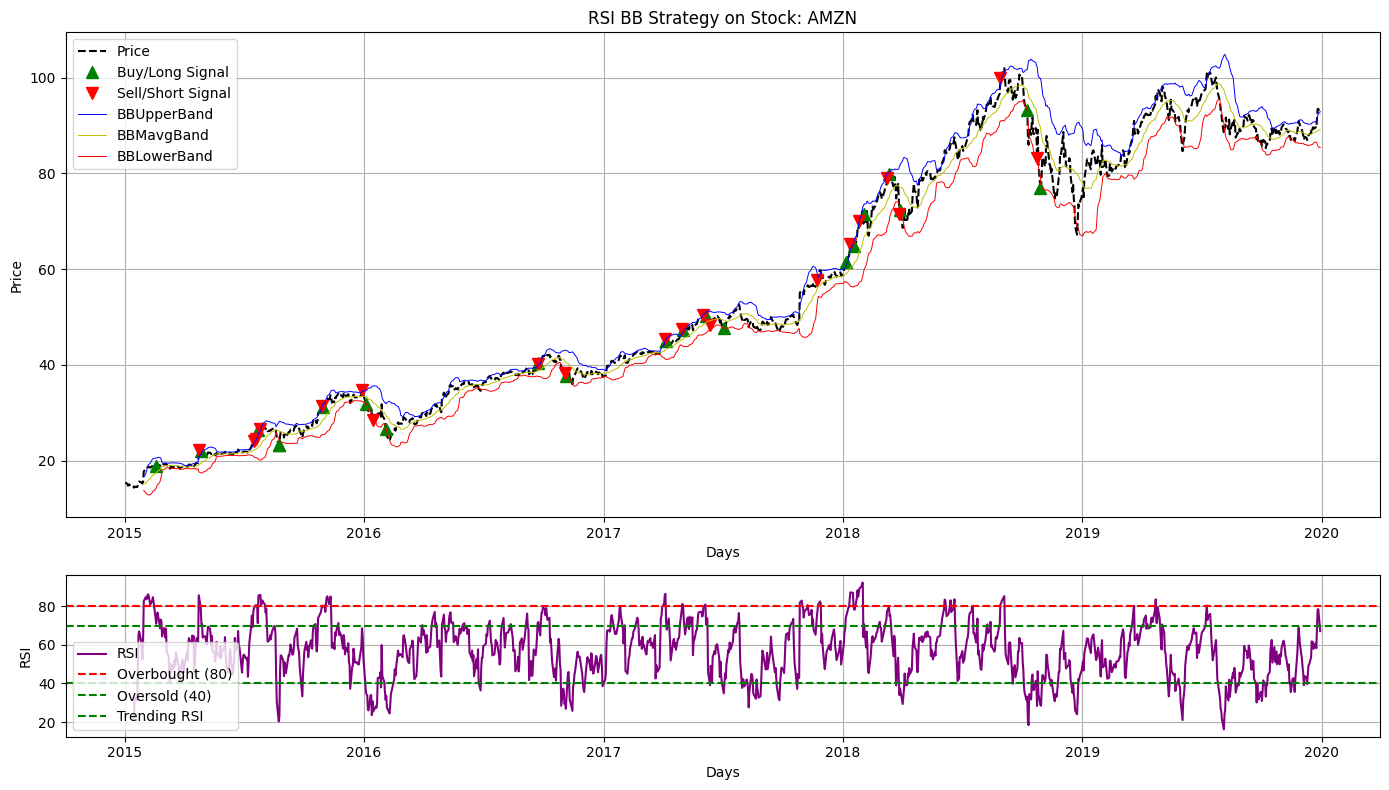

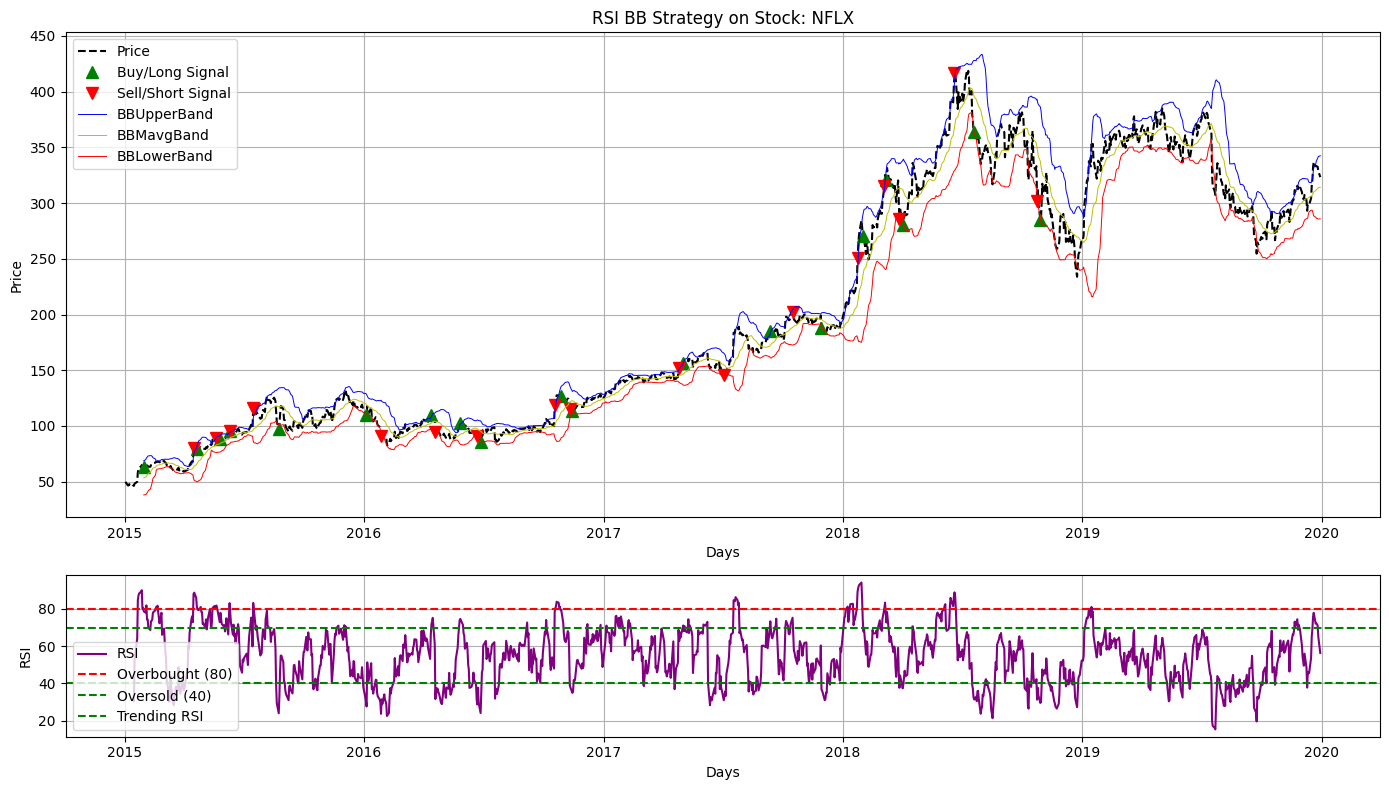

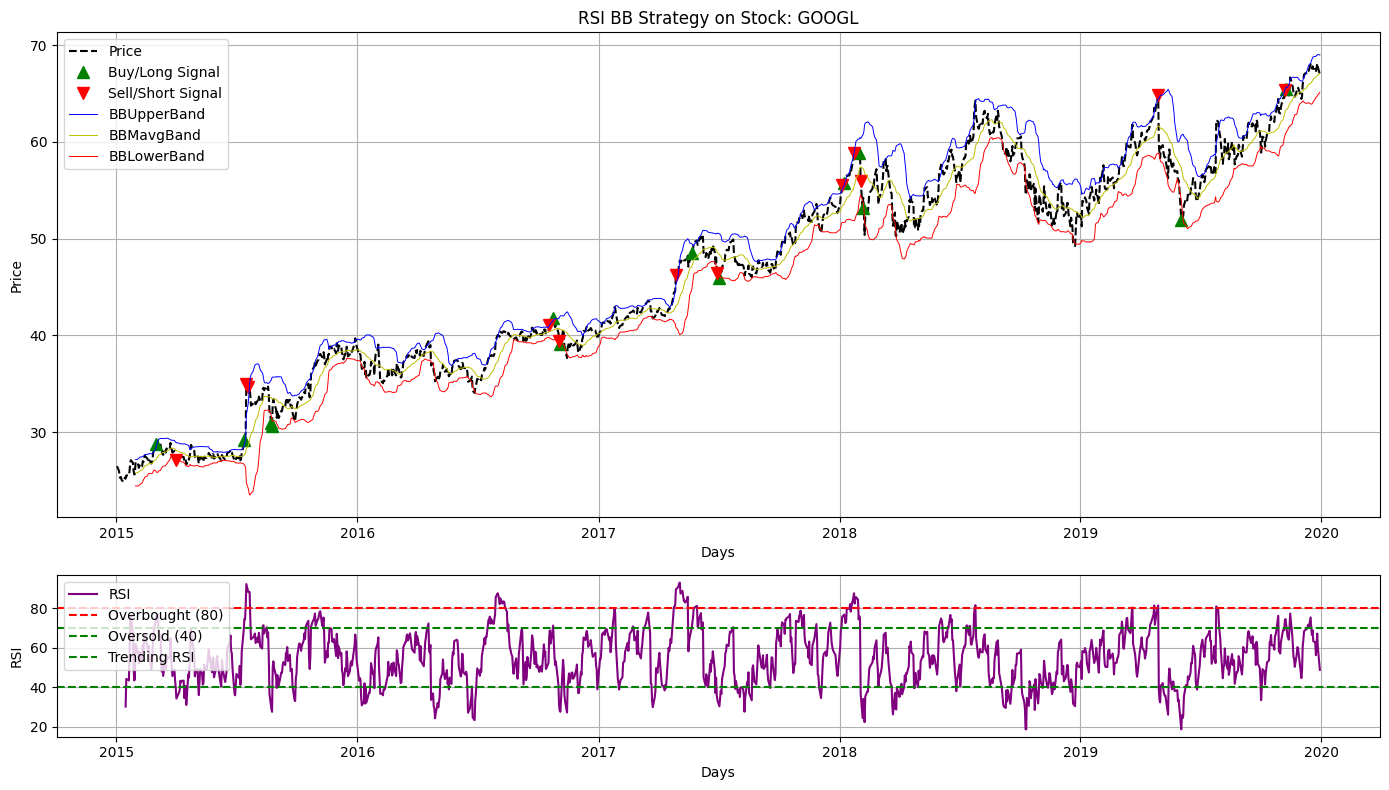

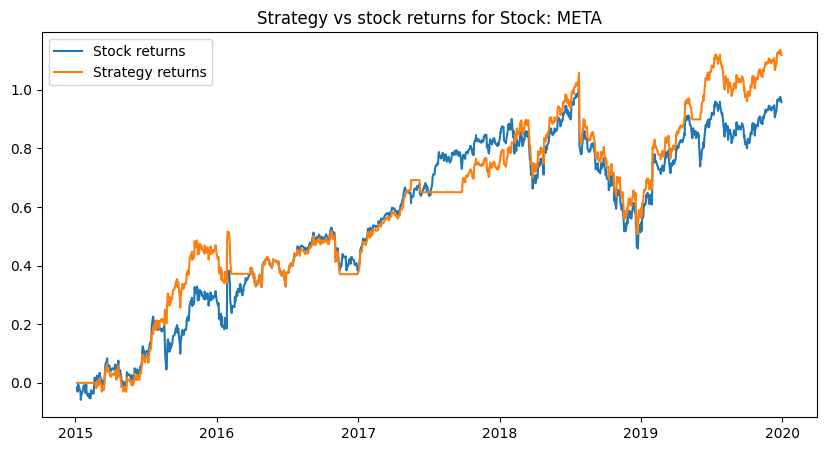

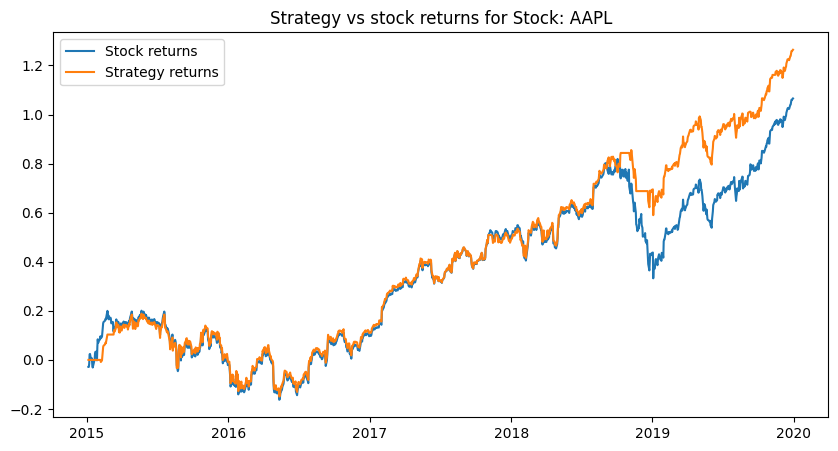

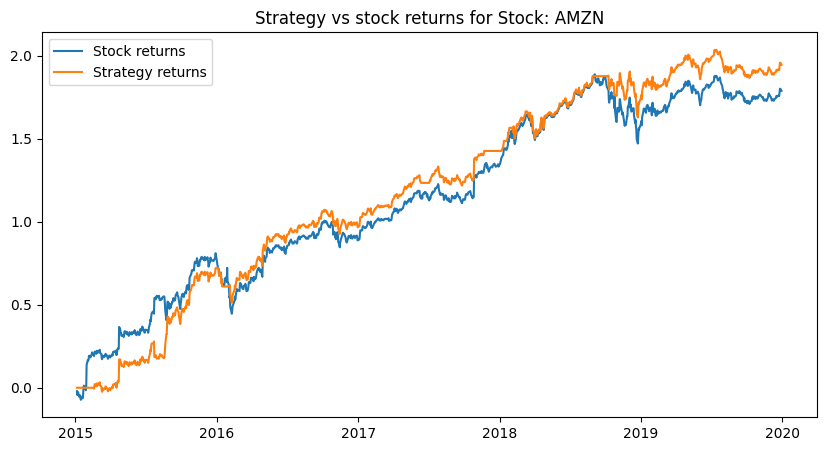

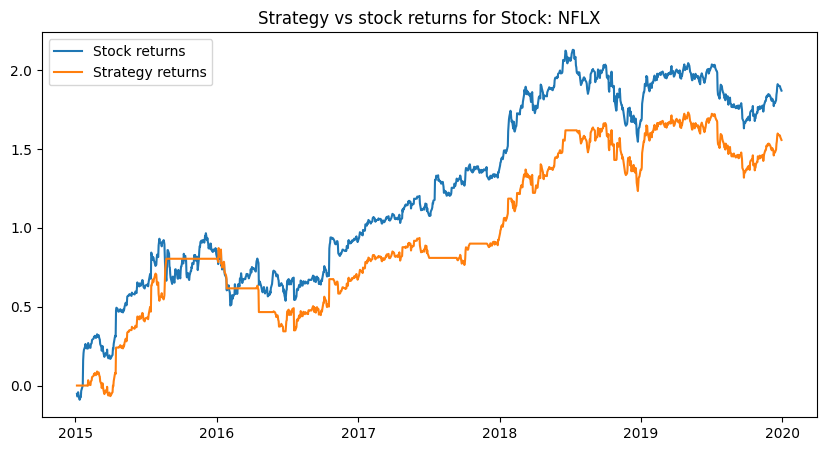

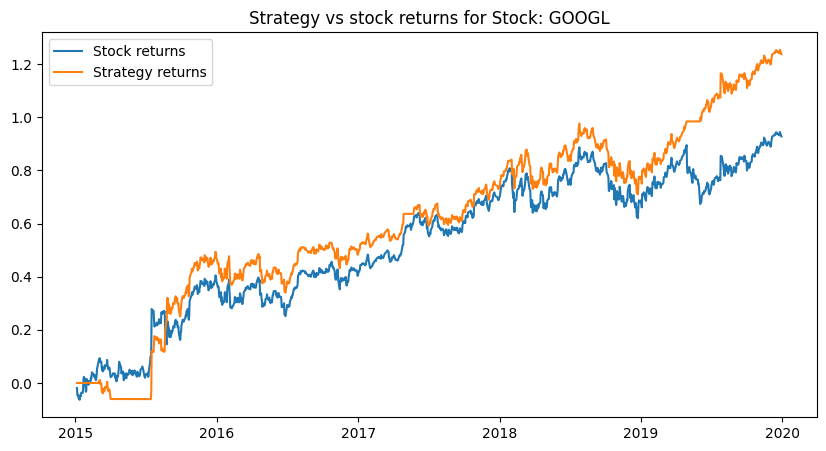

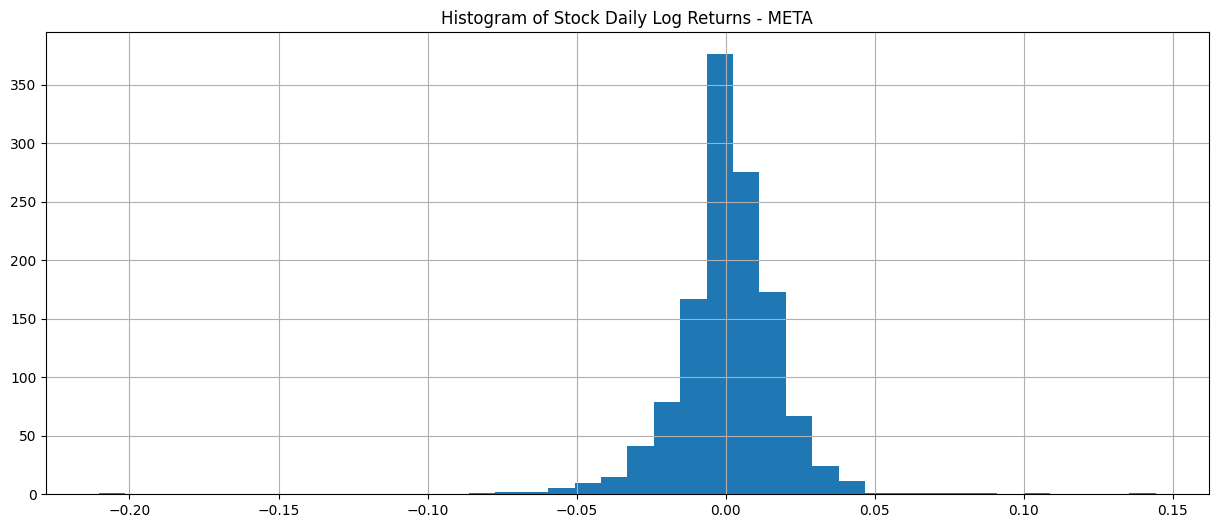

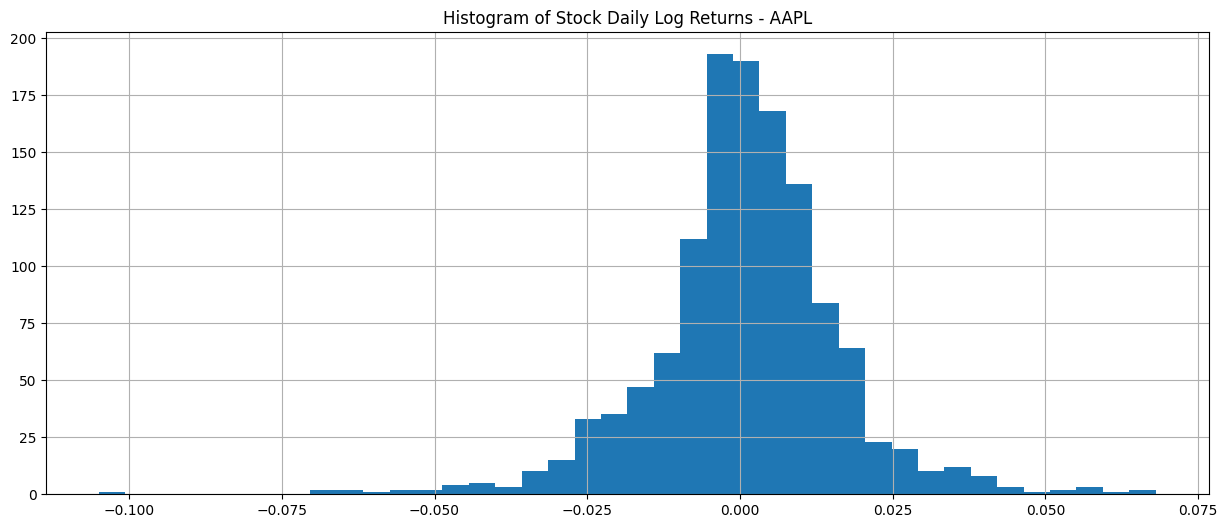

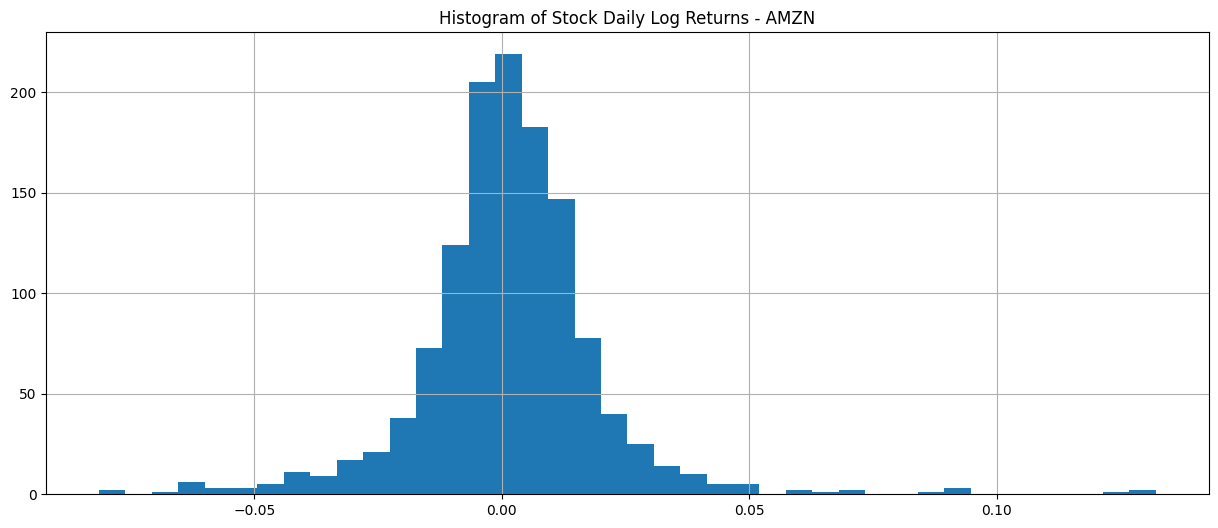

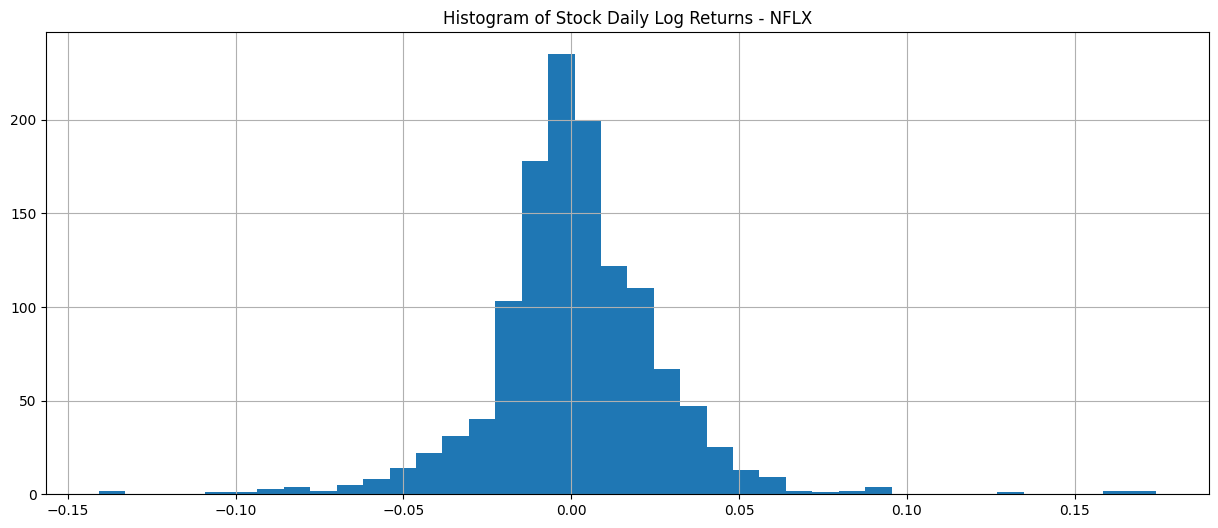

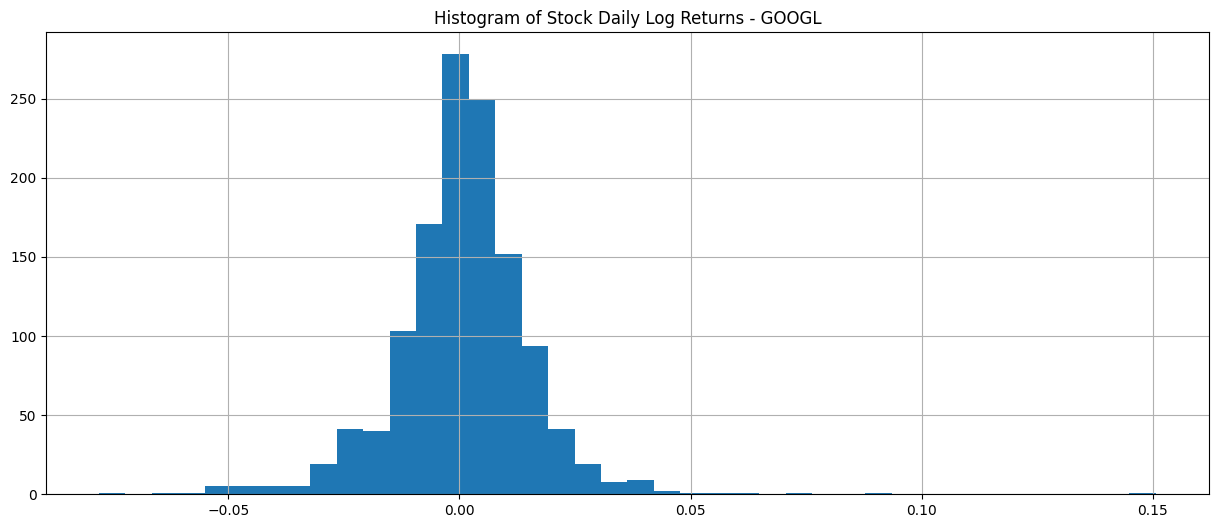

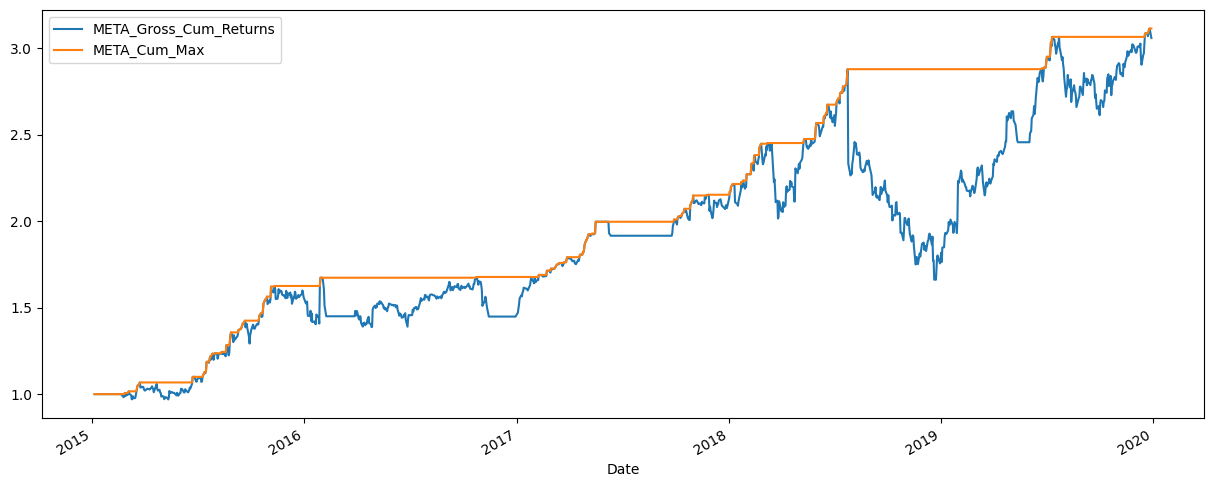

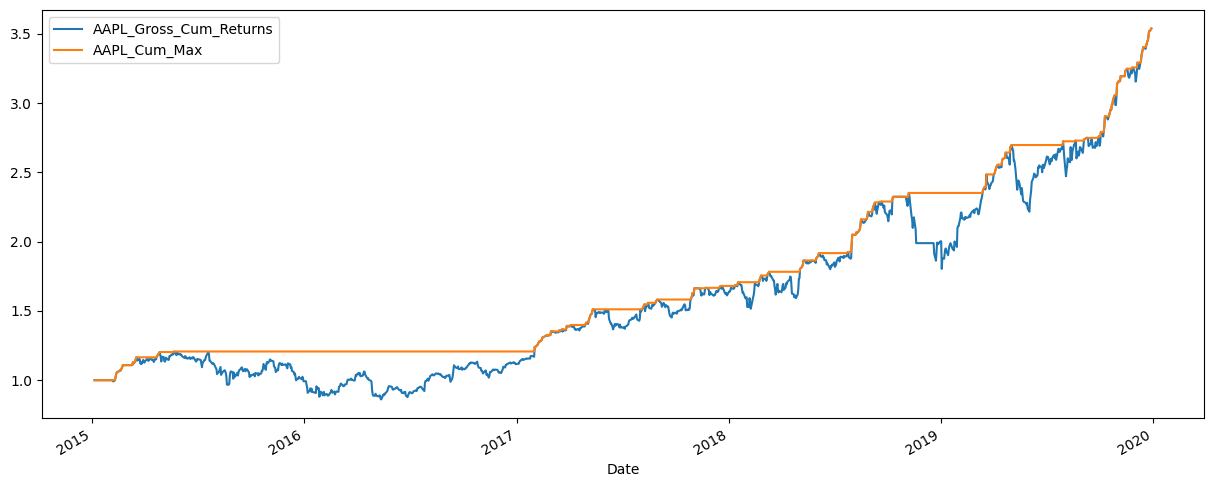

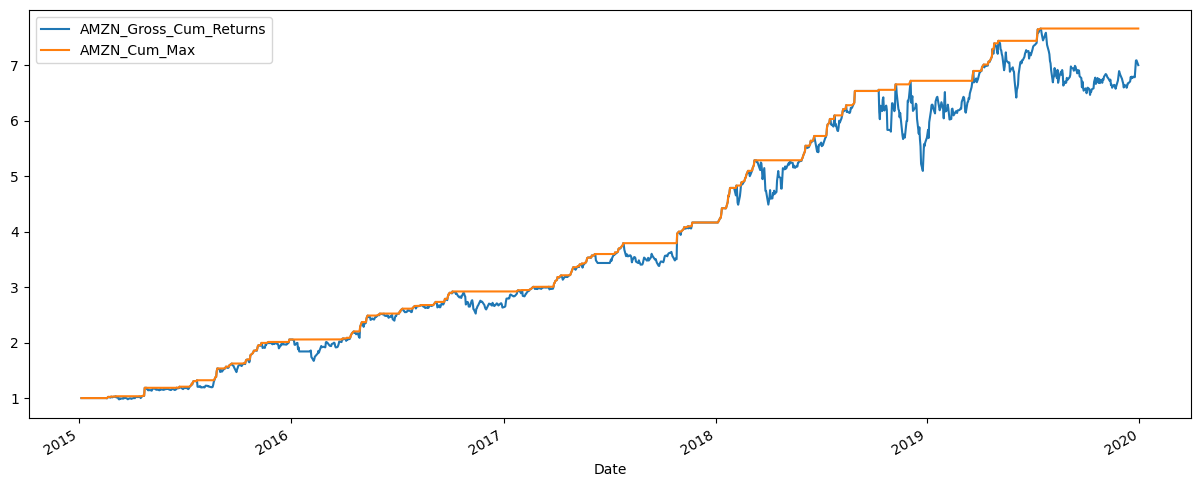

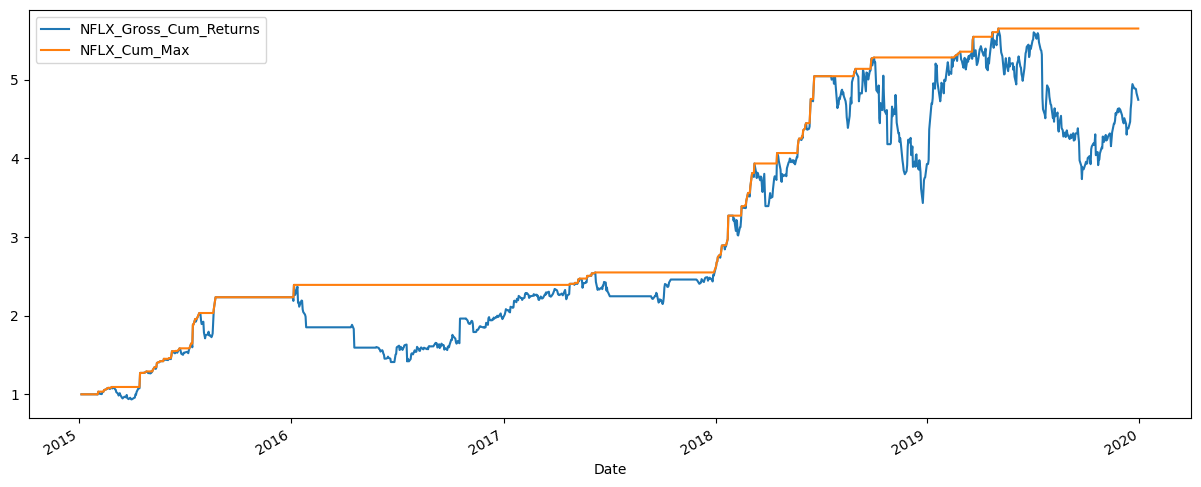

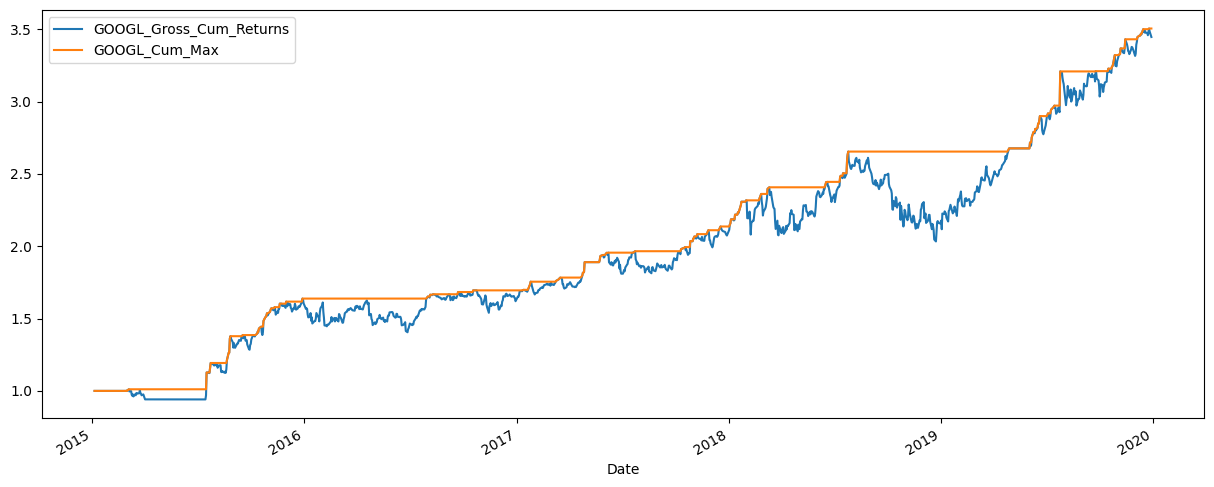

In [ ]:
# Visualisations
strat.visualise_strategy()
strat.visualise_returns()
strat.plot_histograms()
strat.plot_drawdowns()